<a href="https://colab.research.google.com/github/denizgulal/Image_Classification_CNN/blob/main/CNN_for_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

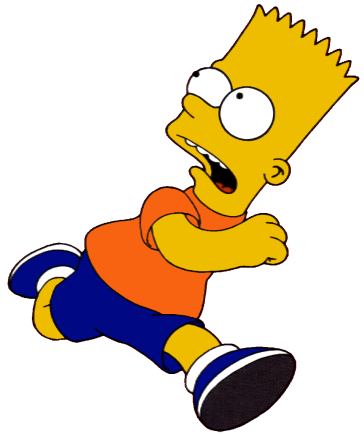

In [4]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

###Train and Test Datasets





>Enriching Dataset





In [5]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


Build and Train The CNN

In [7]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

In [8]:
network.summary()

network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

<ipython-input-8-74c87b2c46be>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50, validation_data=test_dataset)


Epoch 1/50
27/27 [==============================] - 17s 84ms/step - loss: 0.7700 - accuracy: 0.5628 - val_loss: 0.7454 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 1s 29ms/step - loss: 0.5531 - accuracy: 0.6837 - val_loss: 0.5376 - val_accuracy: 0.6852
Epoch 3/50
27/27 [==============================] - 1s 29ms/step - loss: 0.3914 - accuracy: 0.8279 - val_loss: 0.7171 - val_accuracy: 0.7037
Epoch 4/50
27/27 [==============================] - 1s 30ms/step - loss: 0.3726 - accuracy: 0.8419 - val_loss: 0.2797 - val_accuracy: 0.8704
Epoch 5/50
27/27 [==============================] - 1s 34ms/step - loss: 0.3666 - accuracy: 0.8326 - val_loss: 0.3227 - val_accuracy: 0.8519
Epoch 6/50
27/27 [==============================] - 1s 30ms/step - loss: 0.3298 - accuracy: 0.8512 - val_loss: 0.3595 - val_accuracy: 0.8148
Epoch 7/50
27/27 [==============================] - 1s 33ms/step - loss: 0.3220 - accuracy: 0.8558 - val_loss: 0.3848 - val_accuracy: 0.8148
Epoch 8/50
2

Evaluation

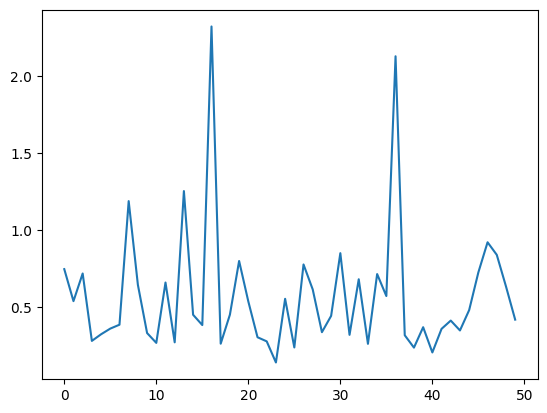

In [9]:
plt.plot(history.history['val_loss']);

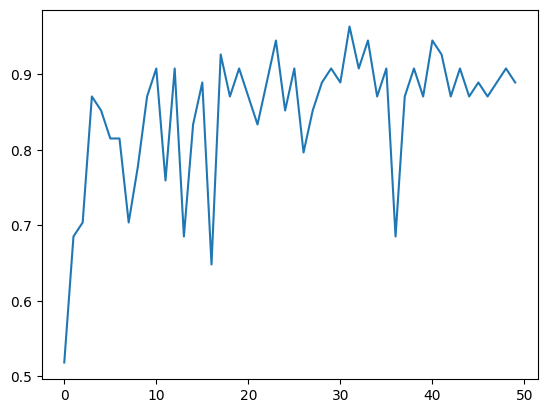

In [10]:
plt.plot(history.history['val_accuracy']);

In [11]:
predictions = network.predict(test_dataset)

54/54 [==============================] - 0s 3ms/step


In [12]:
predictions = np.argmax(predictions, axis = 1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8888888888888888

<Axes: >

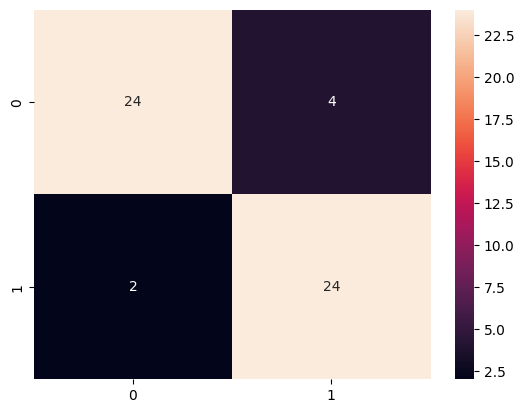

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.86      0.92      0.89        26

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



Save Your Work

In [16]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)


from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()

network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

Test One Image

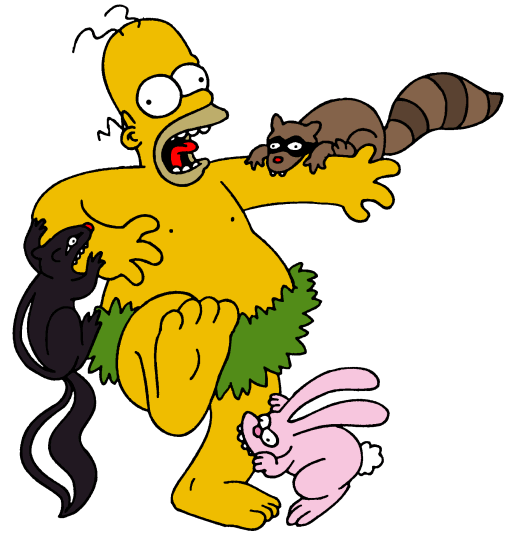

In [17]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(image)

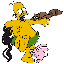

In [18]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

In [19]:
image = image / 255

image = image.reshape(-1, 64, 64, 3)

result = network_loaded(image)

result = np.argmax(result)

if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
